#                                     Kaggle House Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Download the dataset from [here!!](https://www.kaggle.com/c/home-data-for-ml-course/data)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df.shape

(1460, 81)

## Drop columns having more missing value and fill the categorial features with its mode

In [7]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [8]:
df.drop(['Alley'],axis=1,inplace=True)

In [9]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [21]:
features=df.select_dtypes(include=['object']).copy()
categorical_features = features.columns
cat_columns = []
for i in categorical_features:
    cat_columns.append(i)

In [12]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
# for i in df.isna().sum():
#     if i> 0:
#         print(i)

In [15]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

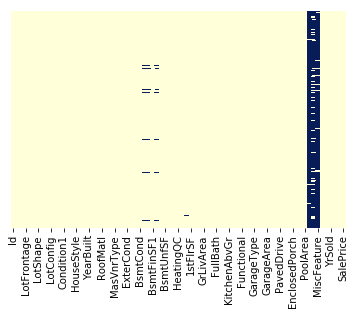

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [17]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [18]:
df.drop(['Id'],axis=1,inplace=True)

In [19]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [20]:
df.dropna(inplace=True)

In [22]:
len(cat_columns)

39

## One hot encoding with multiple columns 

In [24]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [25]:
main_df=df.copy()

In [26]:
test_df = pd.read_csv('formulatedtest.csv')

In [27]:
test_df.shape

(1459, 74)

In [28]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


## Test data appended to training data

In [29]:
final_df = pd.concat([df, test_df], axis= 0)

/mnt/c/Users/91992/Machine_learning/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [30]:
final_df.shape

(2881, 75)

In [31]:
final_df = category_onehot_multcols(cat_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [32]:
final_df.shape

(2881, 235)

## Removing the duplicate column

In [33]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

## Separating training and test data set

In [34]:
df_train = final_df.iloc[:1422,:]
df_test = final_df.iloc[1422:,:]

In [56]:
df_test.drop(['SalePrice'], axis =1, inplace=True)

/mnt/c/Users/91992/Machine_learning/venv/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
X_train.values

array([[8.560e+02, 8.540e+02, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.262e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [9.200e+02, 8.660e+02, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.188e+03, 1.152e+03, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.078e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.256e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [35]:
X_train = df_train.drop(['SalePrice'], axis =1)
y_train = df_train['SalePrice']

In [76]:
X_test = df_test.drop(['SalePrice'], axis =1)
y_test = df_test['SalePrice']

## Prediction and model building 

In [196]:
import sklearn
from sklearn.linear_model import LinearRegression

In [197]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train,  y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [175]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
import pickle
filename= 'XGBmodel.pkl'
pickle.dump(model, open(filename, 'wb'))

In [199]:
y_pred = classifier.predict(df_test)

In [208]:
from sklearn.metrics import accuracy_score

In [201]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
dataset = pd.concat([sub_df['Id'], pred], axis= 1)
dataset.columns= ['Id', 'SalePrice']
dataset.to_csv('my_submissionk.csv', index = False)

In [205]:
from sklearn.model_selection import RandomizedSearchCV
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [203]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

## Hyperparameter tuning

In [206]:
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [207]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   48.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 16.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2], 'base_score': [0.25, 0.5, 0.75, 1], 'n_estimators': [100, 500, 900, 1100, 1500], 'min_child_weight': [1, 2, 3, 4], 'max_depth': [2, 3, 5, 10, 15], 'booster': ['gbtree', 'gblinear']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [217]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## USing XGBRegressor 

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [219]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## Saving your model as a pickle 

In [220]:
import pickle
filename= 'XGBmodel.pkl'
pickle.dump(model, open(filename, 'wb'))

In [221]:
y_pred = regressor.predict(df_test)

In [222]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
dataset = pd.concat([sub_df['Id'], pred], axis= 1)
dataset.columns= ['Id', 'SalePrice']
dataset.to_csv('my_submission_new.csv', index = False)

## This is the Neural Network Implementation 

In [37]:
import tensorflow as tf

In [38]:
print(tf.__version__)

2.1.0


## Create a function for calculating RMSE value

In [39]:

def root_mean_squared_error(y_true, y_pred):
        return tf.sqrt(tf.reduce_mean((y_pred - y_true)**2))

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='elu',input_dim = 174), 
    tf.keras.layers.Dense(25,  activation='elu'),
    tf.keras.layers.Dense(50, activation='elu'),
    tf.keras.layers.Dense(1)
])

# learning_rate = 0.1
# decay_rate = learning_rate / 500
# def exp_decay(epoch):
#     lrate = learning_rate * np.exp(-decay_rate*epoch)
#     return lrate
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(exp_decay)

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 10))

model.compile(loss=root_mean_squared_error, optimizer='Adamax')
history = model.fit(X_train.values, y_train.values, validation_split=0.20, batch_size = 10, epochs=500,verbose=1)#,callbacks=[lr_schedule])

Train on 1137 samples, validate on 285 samples
Epoch 1/500
1137/1137 [==============================] - 1s 1ms/sample - loss: 186121.7801 - val_loss: 166847.5096
Epoch 2/500
1137/1137 [==============================] - 0s 386us/sample - loss: 112623.1769 - val_loss: 68930.0704
Epoch 3/500
1137/1137 [==============================] - 0s 395us/sample - loss: 69764.7946 - val_loss: 67111.8218
Epoch 4/500
1137/1137 [==============================] - 0s 389us/sample - loss: 68397.6867 - val_loss: 65781.0097
Epoch 5/500
1137/1137 [==============================] - 0s 404us/sample - loss: 66088.0575 - val_loss: 64639.5333
Epoch 6/500
1137/1137 [==============================] - 0s 376us/sample - loss: 64444.3178 - val_loss: 63611.8624
Epoch 7/500
1137/1137 [==============================] - 0s 316us/sample - loss: 62623.7104 - val_loss: 62536.5990
Epoch 8/500
1137/1137 [==============================] - 0s 407us/sample - loss: 61635.5878 - val_loss: 61673.1335
Epoch 9/500
1137/1137 [=========

1137/1137 [==============================] - 1s 529us/sample - loss: 34137.6973 - val_loss: 44028.1500
Epoch 142/500
1137/1137 [==============================] - 0s 436us/sample - loss: 33762.8682 - val_loss: 43787.0192
Epoch 143/500
1137/1137 [==============================] - 1s 584us/sample - loss: 33988.7211 - val_loss: 43664.8031
Epoch 144/500
1137/1137 [==============================] - 1s 476us/sample - loss: 33749.3037 - val_loss: 43655.5211
Epoch 145/500
1137/1137 [==============================] - 1s 561us/sample - loss: 34264.3370 - val_loss: 43982.6007
Epoch 146/500
1137/1137 [==============================] - 1s 571us/sample - loss: 33966.7008 - val_loss: 43630.0892
Epoch 147/500
1137/1137 [==============================] - 1s 590us/sample - loss: 34094.7834 - val_loss: 44043.7344
Epoch 148/500
1137/1137 [==============================] - 1s 611us/sample - loss: 34389.9054 - val_loss: 43614.2060
Epoch 149/500
1137/1137 [==============================] - 1s 517us/sample - l

1137/1137 [==============================] - 0s 414us/sample - loss: 30204.9207 - val_loss: 43647.4452
Epoch 282/500
1137/1137 [==============================] - 1s 482us/sample - loss: 30058.1378 - val_loss: 43356.6545
Epoch 283/500
1137/1137 [==============================] - 0s 385us/sample - loss: 30167.7883 - val_loss: 43849.0530
Epoch 284/500
1137/1137 [==============================] - 1s 442us/sample - loss: 30781.4689 - val_loss: 44176.0856
Epoch 285/500
1137/1137 [==============================] - 1s 500us/sample - loss: 30417.6372 - val_loss: 43552.2805
Epoch 286/500
1137/1137 [==============================] - 1s 522us/sample - loss: 30415.0634 - val_loss: 44867.4792
Epoch 287/500
1137/1137 [==============================] - 0s 392us/sample - loss: 30111.4738 - val_loss: 43267.1371
Epoch 288/500
1137/1137 [==============================] - 0s 395us/sample - loss: 29988.6766 - val_loss: 43344.2364
Epoch 289/500
1137/1137 [==============================] - 1s 466us/sample - l

1137/1137 [==============================] - 1s 509us/sample - loss: 27068.3278 - val_loss: 41127.8610
Epoch 422/500
1137/1137 [==============================] - 0s 414us/sample - loss: 26585.3687 - val_loss: 41254.1231
Epoch 423/500
1137/1137 [==============================] - 0s 412us/sample - loss: 26737.1342 - val_loss: 41435.0979
Epoch 424/500
1137/1137 [==============================] - 1s 464us/sample - loss: 27106.4386 - val_loss: 41068.9291
Epoch 425/500
1137/1137 [==============================] - 0s 402us/sample - loss: 26650.9388 - val_loss: 42326.0560
Epoch 426/500
1137/1137 [==============================] - 1s 491us/sample - loss: 26446.4152 - val_loss: 40989.3493
Epoch 427/500
1137/1137 [==============================] - 0s 399us/sample - loss: 26900.1723 - val_loss: 41165.5782
Epoch 428/500
1137/1137 [==============================] - 0s 400us/sample - loss: 27196.0761 - val_loss: 40944.4322
Epoch 429/500
1137/1137 [==============================] - 0s 399us/sample - l

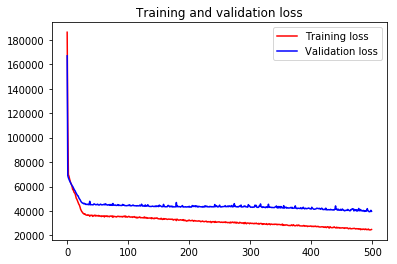

<Figure size 432x288 with 0 Axes>

In [55]:
#optimizer = 'Adamax'
import matplotlib.pyplot as plt
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [56]:
ann_pred=model.predict(df_test.drop(['SalePrice'],axis=1).values)


In [57]:
ann_pred

array([[119980.18],
       [157477.95],
       [192092.48],
       ...,
       [168594.73],
       [114930.38],
       [206490.64]], dtype=float32)

In [58]:
pred = pd.DataFrame(ann_pred)
sub_df = pd.read_csv('sample_submission.csv')
dataset = pd.concat([sub_df['Id'], pred], axis= 1)
dataset.columns= ['Id', 'SalePrice']
dataset.to_csv('my_submission_NN.csv', index = False)